# From getting to pre-processing data
In questa notebook affronteremo alcuni elementi che fanno parte di un progetto orientato al Machine Learning:
1. Ottenere i dati (facilitato)
2. Visualizzare i dati ottenuti
3. Trasformare/ manipolare i dati per fornire un input agli algoritmi di ML

A fine didattici/progetti personali, le fonti per ottenere dataset open sono molteplici:
- Kaggle (https://www.kaggle.com/)
- Machine Learning repository @ UC Irvine (https://archive.ics.uci.edu/ml/index.php)
- Reddit: subreddit dataset (https://www.reddit.com/r/datasets/)

Per questa prima esperienza utilizziamo un dataset ottenuto da Kaggle che affronta il problema dall **churn prediction**. Possiamo sintetizzare il problema in questo modo: *dato un insieme di clienti che hanno sottoscritto un servizio e caratterizzati/descritti da un insieme di proprieta', identificare un sottoinsieme di client che molto probabilmente abbondonera' in un dato momento nel futuro (di solito a breve termine) il servizio*. Il problema e' piuttosto generico in quanto riguarda in sostanza la risoluzione di un contratto.

<p style="border: 3px solid crimson;box-shadow: 5px 6px indianRed;padding:20px;">Formalmente ogni cliente $c$ e' descritto da un vettore $\mathbf{c}=<c_1,\ldots,c_n>$ t.c. $c_i\in S_i$, dove $S_i$ e' un insieme, denota la proprieta' $i$-esima che caratterizza l'utente $c$. Per predirre qualora un generico utente con determinate proprieta' al tempo $t$, al tempo $t+\Delta t$ abbandoni il servizio, possiamo **imparare** (learning) in modo automatico (machine) una funzione $f:S_1\times\ldots\times S_n\rightarrow \{0,1\}$, dove $0$ indica la permanenza nel servizio, viceversa $1$ indica l'abbandono del servizio.</p>

Nel nostro caso affrontiamo il problema di churn prediction in ambito bancario: credit card churn prediction. 

Il dataset e' disponibile all'indirizzo https://www.kaggle.com/sakshigoyal7/credit-card-customers e riporta la seguente descrizione:
```
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.
This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.
We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.
```

### Definire l'obiettivo
Lo sviluppo di un progetto che utilizzi ML solitamente e' orientato ad un **obiettivo** che non riguarda propriamente il ML, ma che utilizza le metodologie ML per **raggiungere** un'obiettivo. L'obiettivo determina:
- come modello il problema
    - supervisionato/non supervisionato, classificazione/regressione, batch/online, univariata/multivariata
- quali modelli/algoritmi adottare
    - fortemente dipendente dal punto precedente
- quali misure di performance utilizzare nella valutazione del modello

Nel nostro caso (credi card churn prediction) l'obiettivo e'molto specifico e ben definito, e la precedente trattazione ci porta a modellare il problema come un problema _supervisionato_ di _classificazione_ binaria in modalita' batch dato che il dataset e' facilmente caricabile in memoria.

## Getting and loading the data

Per un'analisi preliminare del dataset e caricarlo in memoria utilizziamo il modulo **pandas**

In [1]:
import pandas as pd

In [19]:
raw_dataset = pd.read_csv('BankChurners.csv')

_Commento_: Potevo avere un'anteprima del file utilizzando anche un foglio di calcolo, dato che il formato e' CSV. E' utile verificare se la prima riga del file sia l'intestazione o header, e quindi contenere il nome delle colonne. Per verificare la presenza dello header posso utilizzare il comando head della shell

Per avere una prima intuizione sul tipo di dati messi a disposizione, possiamo visualizzare le prime 5 righe del dataset utilizzando il metodo **head**

In [4]:
raw_dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Ci sono 23 colonne.

Per avere una piu'completa descrizione della struttura del dataset utilizziamo i metodi **info** oppure **describe**. IL primo metodo e' piu'orientato alla rappresentazione del dato, mentre il secondo metodo riporta le statistiche riguardanti le varie colonne, qualora siano di tipo numerico.

In [6]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Confermiamo che abbiamo dati riguardanti 10127 clienti e in questo caso non abbiamo dati mancanti (Non-null count). I tipi di dati sono sia numerici sia categorici (Dtype).

In [7]:
raw_dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Per avere anche una prima impressione sulle colonne di tipo categorico/testuale possiamo utilizzare il metodo **value_counts**.

🤡 Su diverse microblogging platforms trovare numerosi thread sulla controintuivita' del nome di questo metodo. SPOILER: la probabilita' di scriverlo correttamente al primo colpo e' prossima allo zero 🤡.

In [8]:
raw_dataset['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

Infine otteniamo il nome delle varie colonne in modo inferire - qualora non sia specificato in qualche documento - il significato della colonna. Tramite l'attributo **columns** otteniamo questa informazione

In [11]:
raw_dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

| Nome colonna | Significato|
| --- | --- |
|CLIENTNUM| ID del cliente|
|Attrition_Flag| Indica se il cliente ha abbandonato (valore 1)|
|Customer_Age| Eta' del cliente in anni|
|Gender|Genere del cliente|
|Dependent_count| Numero di dipendenti|
|Education_Level| Livello di istruzione del cliente|
|Marital_Status| Stato civile|
|Income_Category| Livello di reddito in dollari|
|Card_Category| Tipo di carta di credito|
|Months_on_book| Numero di mesi di iscrizione al servizio|
|Total_Relationship_Count| Numero di prodotti in possesso del cliente|
|Months_Inactive_12_mon| Numero di mesi di inattivita' negli ultimi 12 mesi|
|Contacts_Count_12_mon| Numero di contatti negli ultimi 12 mesi|
|Credit_Limit| Limite di credito sulla carta|
|Total_Revolving_Bal| Bilancio revolving|
|Avg_Open_To_Buy|
|Total_Amt_Chng_Q4_Q1| Differenza del totale delle transazioni tra Q4 e Q1|
|Total_Trans_Amt| Totale delle transazioni su ultimi 12 mesi|
|Total_Trans_Ct| Numero di transazioni negli ultimi 12 mesi|
|Total_Ct_Chng_Q4_Q1| Differenza del numero di transazioni in Q4 rispetto a Q1|
|Avg_Utilization_Ratio| ?|
|Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1| Da eliminare|
|Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2| Da eliminare|

Un'analisi preliminare delle caratteristiche del dataset puo' avvenire in modo qualitativo attraverso la visualizzazione della distribuzione delle proprieta'. 

Utilizziamo il modulo **matplotlib** per la visualizzazione nel corso di questo laboratorio.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In pandas il metodo **hist** permette una rapida visualizzazione della distribuzione delle proprieta' numeriche attraverso istogrammi.

In [20]:
# Prima di visualizzare le distribuzioni, rimuoviamo le colonne che iniziano con Naive Bayes e la colonna con il codice cliente
raw_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],
                 axis=1,
                 inplace=True)

array([[<AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>],
       [<AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>],
       [<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

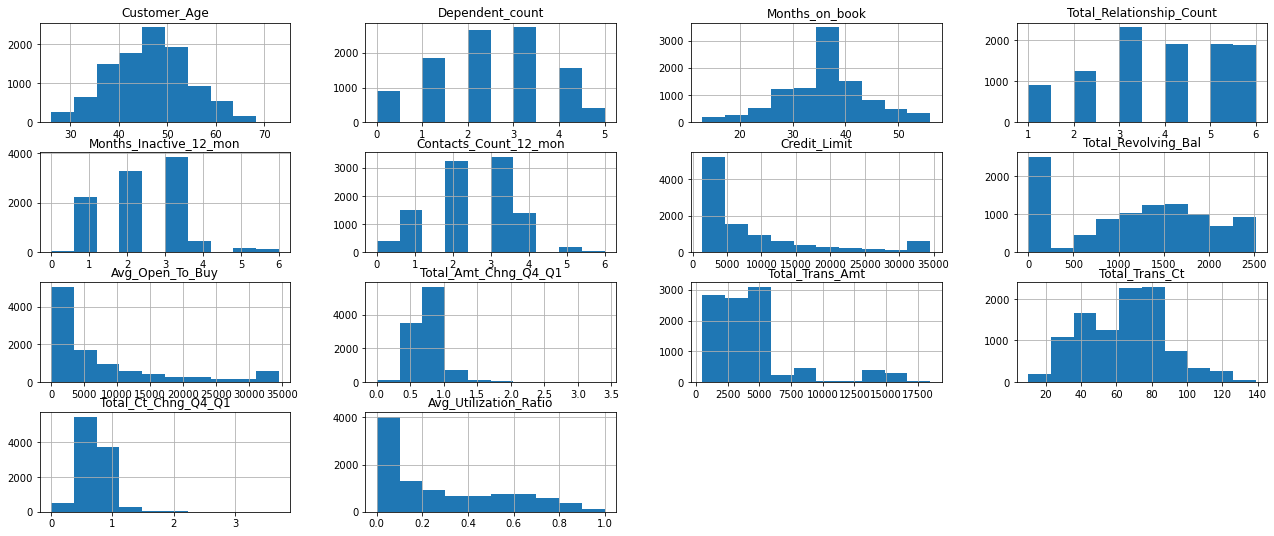

In [24]:
raw_dataset.hist(figsize=(22,9))